In [17]:
!pip install -q qiskit

!pip install -q pylatexenc

!pip install -q qiskit-aer

<div align=left class="alert alert-block alert-success">
    <h1><a id='Foundations'>Part 1: Quantum Computing with Qiskit
</a></h1>
</div>

# Building Blocks for Quantum Computing



*   In classical comuting, data and information is encoded in bits $0$ and $1$.
*   In Quantum Computing , information is encoded in qubits which can exist in the state

$$ |0\rangle = \begin{pmatrix} 1  \\ 0  \end{pmatrix}  \qquad  \text{Or} \qquad |1\rangle = \begin{pmatrix} 1  \\ 0  \end{pmatrix} $$

 or in superposition  $|0\rangle $ and $|1\rangle$ with probability $|\alpha|^2$ and $|\beta|^2$ respectfully

$$\psi \rangle = \alpha |0\rangle + \beta |1\rangle  :=  \begin{pmatrix} \alpha  \\ \beta  \end{pmatrix} $$


A qubit can be  visualized on a Block sphere, where we can see it as a vector on the sphere with length 1.

A qubit in state $|0\rangle$ would be visualized as:





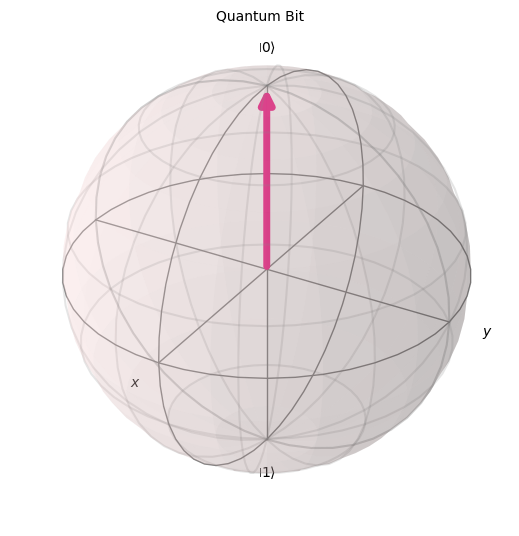

In [19]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1], "Quantum Bit")

# Quantum Gate and Circuits

Quantum operations with qubits are performed using uniytary transformations $\mathcal{U}$ which  are represented by quantum circuits which are compose of quantum gates acting on the qubits. Quantum gates are unitary operators.

$$ UU^\dagger = U^\dagger U = I$$

A unitary tranfromations is representation by:

$$ \mathcal{U} : |\psi ⟩= U |\psi_0 ⟩$$



### Single Qubit Gates

In Qiskit, qubit a manipulated using quantum gates (Unitary operators) which are operations are similar to logic gates in classical computing. Single qubit gates manipulate individual qubits. Examples include
We have single qubit gates that manipulate the state of individual qubits qubit. Examples include:




| Gate         | Operation                                | Matrix Representation             |
|--------------|------------------------------------------|-----------------------------------|
| Identity (I) | No operation (Leaves qubit unchanged)    | $\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$ |
| X (Pauli-X)  | Bit-flip (or NOT)                        | $\begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}$ |
| Y (Pauli-Y)  | Bit-flip and phase-flip                 | $\begin{bmatrix}0 & -i \\ i & 0\end{bmatrix}$ |
| Z (Pauli-Z)  | Phase-flip                               | $\begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$ |
| H (Hadamard) | Superposition                            | $\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}$ |
| Rx(θ)        | X-axis rotation by angle θ              | $\begin{bmatrix}\cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{bmatrix}$ |
| Ry(θ)        | Y-axis rotation by angle θ              | $\begin{bmatrix}\cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{bmatrix}$ |
| Rz(θ)        | Z-axis rotation by angle θ              | $\begin{bmatrix}e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}}\end{bmatrix}$ |



### Multi-Qubit Gates

The states of two or more qubits can be correlated in such a way that the state of one qubit instantly influences the state of the other, regardless of distance. This phenomenon is called *Entaglement*. An example of entangled states are the Bell states. Let's have a closer look;

A state given by

$$ |\psi \rangle = \frac{|00\rangle + |01\rangle}{\sqrt{2}}$$
is non-entangle as it can be represented as a product state.


$$ |\psi \rangle  = |0\rangle \otimes \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |0\rangle|+\rangle$$


while a Bell state (entangled state) given by

$$ |\Psi^+ \rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}, $$


can not be represented as a product state.

To create entanglement between qubits we need to apply multi-qubit gates.  Multi-qubit gates operate on multiple qubits. An important one is the **CNOT gate** (Controlled-NOT), which flips the second qubit if and only if the first qubit is |1⟩. Other gates that can be used to manipulate entanglement in quantum systems are;

| Gate                   | Operation                                             | Matrix Representation                 |
|------------------------|-------------------------------------------------------|---------------------------------------|
| CNOT (Controlled-X)    | Flips the target qubit if the control qubit is 1     | $\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}$ |
| SWAP                   | Swaps the states of two qubits                       | $\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}$ |
| Toffoli (CCNOT)        | Flips the target qubit if both control qubits are 1  | $\begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{bmatrix}$ |


The next cell illustrates an example of a quantum circuit with a Multi-qubit  '*cx*' gate and a single-qubit '*H*' gate

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


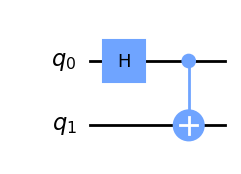

In [21]:
from qiskit import QuantumCircuit

qc_multi = QuantumCircuit(2)
qc_multi.h(0)
qc_multi.cx(0,1)
qc_multi.draw('mpl')

The circuit in the above example reconstruct the Bell state
$$ |\psi \rangle = \frac{|00\rangle + |01\rangle}{\sqrt{2}},$$

by first bringing a Qubit into superposition (by applying a Hadamard gate) and then by applying a CNOT gate with the first qubit as the control to a second qubit.

##  Writing a quantum Program

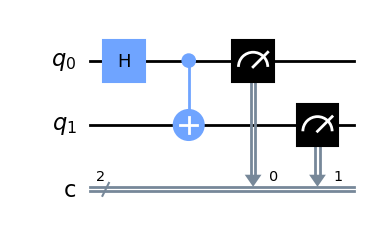

In [23]:
from qiskit import QuantumRegister, ClassicalRegister

#define the quantum registers (the number of qubits)
qbit = QuantumRegister(2,'q')
#define the classical registers (the number of classical bits for measuring)
cbit = ClassicalRegister(2,'c')

#initialize quantum circuit
circuit = QuantumCircuit(qbit,cbit)

#apply gates
circuit.h(qbit[0])
circuit.cx(qbit[0],qbit[1])

#Apply measurements
circuit.measure([qbit[0],qbit[1]],[cbit[0],cbit[1]])

circuit.draw(output='mpl')

<h2><a id='primitives'> Running your circuit on a local simulator with Qiskit Primitives </a></h2>

Primitives allow you to write quantum code for a specific backend without having to explicitly manage some of the finer details.
Additionally, they provide a seamless way to access the latest optimizations in IBM Quantum hardware and software.iskit provides the following

Here is a list of availbale qiskit primitives:
> An Estimator Primitive computes expectation values of observables with respect to states prepared by quantum circuits.

> A Sampler Primitive calculates probabilities or quasi-probabilities of bitstrings from quantum circuits. Quasi-probabilities are similar to regular probabilities except they may include negative values, which can occur when using certain error mitigation techniques.

### Using the Estimator primitive

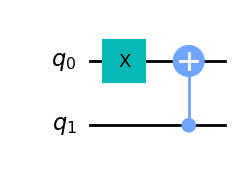

>>> EstimatorResult(values=array([-1.]), metadata=[{}])
  > Expectation value: [-1.]


In [24]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

qc = QuantumCircuit(2)
qc.x(0)
qc.cx(1,0)

display(qc.draw('mpl'))

observable=SparsePauliOp("ZZ")

estimator = Estimator()
job = estimator.run(qc, observable)
result = job.result()

print(f">>> {result}")
print(f"  > Expectation value: {result.values}")


#### Using the Sampler primitive

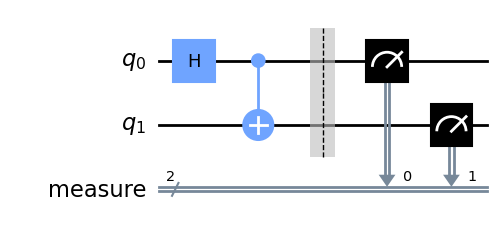

>>> SamplerResult(quasi_dists=[{0: 0.5, 3: 0.5}], metadata=[{}])
  > Quasi-probability distribution: {'00': 0.4999999999999999, '11': 0.4999999999999999}


In [25]:
from qiskit.primitives import Sampler

qc_multi = QuantumCircuit(2)
qc_multi.h(0)
qc_multi.cx(0,1)

qc_multi.measure_active()
display(qc_multi.draw('mpl'))

#circuit = random_circuit(2, 2, seed=1, measure=True).decompose(reps=1)

sampler = Sampler()
job = sampler.run(qc_multi)
result = job.result()

print(f">>> {result}")

prob_distribution = result.quasi_dists[0].binary_probabilities()

print(f"  > Quasi-probability distribution: {prob_distribution}")




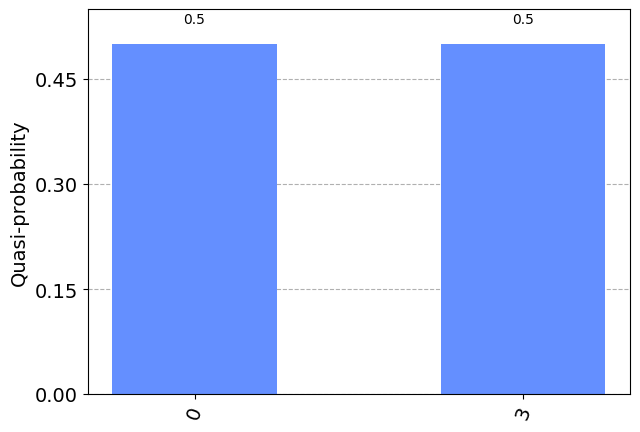

In [26]:
from qiskit.visualization import plot_histogram
plot_histogram(result.quasi_dists)

<h2><a id='runtime'> Running your circuit on a real device with Qiskit Runtime </a></h2>

Qiskit Runtime is a cloud-based quantum computing service.It offers computational primitives to perform foundational quantum computing tasks that use built-in error suppression and mitigation techniques.

To use the

In [34]:
!pip install -q qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.5 MB/s eta 0:00:00


In [ ]:
from qiskit import IBMQ
IBMQ.save_account(token='My_API_token')

<ipython-input-35-3957fc3d318b>:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(token='229b2bd6e1dc34bed2b88cfb5a2a9f03ee2eecfa0b5475bd3b371a1ea3f1f7e5afe2a78f5bcceaa2bb0e2866a4f0a809d9bc27c363e92be8dd3806d201029475')
<ipython-input-35-3957fc3d318b>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(token='229b2bd6e1dc34bed2b88cfb5a2a

In [40]:
provider = IBMQ.load_account()

# Let's see what backends are available for your account.
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [43]:
!pip install -q qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.0 MB/s eta 0:00:00


In [44]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
from qiskit.tools.visualization import plot_distribution


service = QiskitRuntimeService(channel="ibm_quantum")

# Get the least busy backend, this step may take a while
real_backend = service.least_busy(min_num_qubits=4, simulator=False)
print(real_backend)

with Session(service, backend=real_backend) as session:
    sampler = Sampler(session=session)
    job_real = sampler.run(qc_multi)

<IBMBackend('ibm_osaka')>


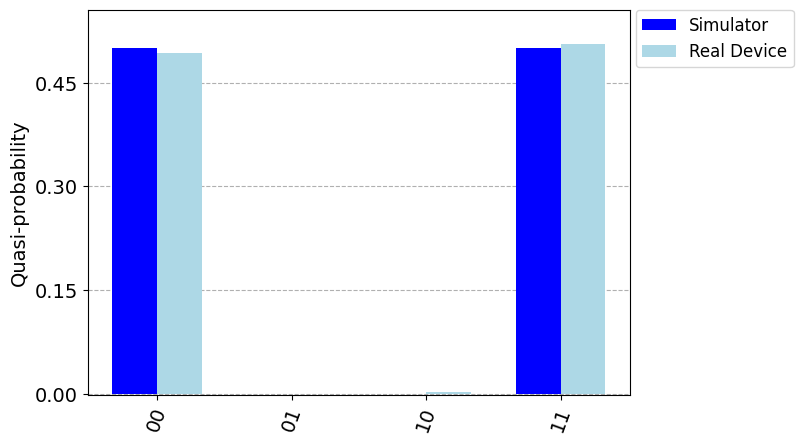

In [45]:
prob_distribution_real = job_real.result().quasi_dists[0].binary_probabilities()

plot_distribution(
    data=[prob_distribution, prob_distribution_real],
    legend=['Simulator', 'Real Device'],
    color=['blue', 'lightblue'],
    bar_labels = False
)

<div align=left class="alert alert-block alert-success">
    <h1><a id='HybridOverview'>Section 2: Hybrid Classical-Quantum Machine Learning
</a></h1>
</div>

In [47]:
import os
from google.colab import files
#import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import calibration_curve


#packages for the classical part of the model
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F

## Import *data*

### Data Loading

Loading the data locally and  defining Data-loaders for train, validation and test

We are going to use the MNIST Dataset which is a dataset of handwritten images. We perform a classification task on this dataset using a Hybrid quantum neural network

In [48]:
# Train Dataset
# -------------

# Set train shuffle seed (for reproducibility)
manual_seed(42)

batch_size = 1
n_samples = 100  # We will concentrate on the first 100 samples

# Use pre-defined torchvision function to load MNIST train data
X_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_train.targets == 0)[0][:n_samples], np.where(X_train.targets == 1)[0][:n_samples]
)
X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

# Define torch dataloader with filtered data
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 25291469.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 61583982.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30090417.98it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10068989.84it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [50]:
# Test Dataset
# -------------

# Set test shuffle seed (for reproducibility)
# manual_seed(5)

n_samples = 50

# Use pre-defined torchvision function to load MNIST test data
X_test = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_test.targets == 0)[0][:n_samples], np.where(X_test.targets == 1)[0][:n_samples]
)
X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

# Define torch dataloader with filtered data
test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=True)

## Data Visualization

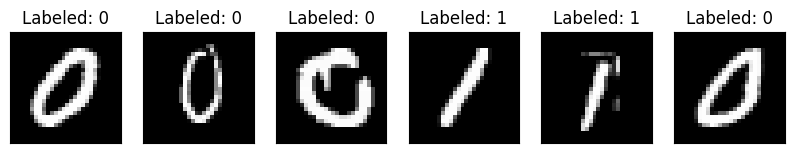

In [51]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

# Hybrid Quantum Transfer Learning

A paradigm that combines  classical and quantum elements to potentially enhance the adaptability and learning ofmachine learning models. Quantum tranfer learning exploits quantum principles such as quantum entanglement, superposition and parallelism.

A classical pre-tained neural network is augmented with a variational quantum circuit.  

In [53]:
!pip install -q qiskit-machine-learning
!pip install -q qiskit_algorithms

In [54]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.tools.jupyter import *

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap #quantum feature maps
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42

# Defining the QNN and Hybrid Model
To combine the quantum layer and the classical layer we use TorchConnector, a qiskit library design for such task.  After defining our quantum neural network layer (in this case, a EstimatorQNN), we can embed it into a layer in our torch Module by initializing a torch connector as TorchConnector(qnn).

In [56]:
# Define and create QNN
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()



In [57]:
# Define torch NN module

class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(1,2, kernel_size=5)
        self.conv2 = Conv2d(2,16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256,64)
        self.fc2 = Linear(64, 2)  # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        # uniformly at random from interval [-1,1].
        self.fc3 = Linear(1, 1)  # 1-dimensional output from QNN

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # apply QNN
        x = self.fc3(x)
        return cat((x, 1 - x), -1)


model4 = Net(qnn4)

# Model Training

In [63]:
# Define model, optimizer, and loss function
optimizer = optim.Adam(model4.parameters(), lr=0.001)
loss_func = NLLLoss()

# Start training
epochs = 50  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

Training [2%]	Loss: -3.8086
Training [4%]	Loss: -4.0348
Training [6%]	Loss: -4.1958
Training [8%]	Loss: -4.4400
Training [10%]	Loss: -4.5995
Training [12%]	Loss: -4.7855
Training [14%]	Loss: -5.0030
Training [16%]	Loss: -5.1827
Training [18%]	Loss: -5.3138
Training [20%]	Loss: -5.5762
Training [22%]	Loss: -5.8172
Training [24%]	Loss: -6.0191
Training [26%]	Loss: -6.1959
Training [28%]	Loss: -6.3972
Training [30%]	Loss: -6.5559
Training [32%]	Loss: -6.7834
Training [34%]	Loss: -7.0292
Training [36%]	Loss: -7.2072
Training [38%]	Loss: -7.4283
Training [40%]	Loss: -7.6700
Training [42%]	Loss: -7.7836
Training [44%]	Loss: -7.9348
Training [46%]	Loss: -8.2109
Training [48%]	Loss: -8.4177
Training [50%]	Loss: -8.6379
Training [52%]	Loss: -8.8760
Training [54%]	Loss: -9.0237
Training [56%]	Loss: -9.2254
Training [58%]	Loss: -9.4012
Training [60%]	Loss: -9.6528
Training [62%]	Loss: -9.8230
Training [64%]	Loss: -10.0118
Training [66%]	Loss: -10.2269
Training [68%]	Loss: -10.2376
Training [70%]	

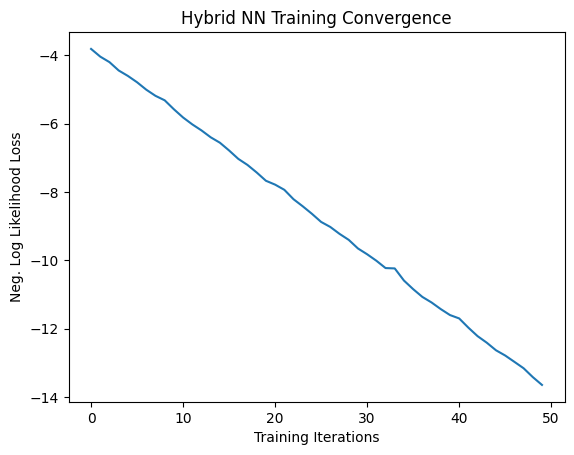

In [64]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()



## *Evaluation*

In [65]:
model4.eval()  # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model4(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100
        )
    )

Performance on test data:
	Loss: -13.6125
	Accuracy: 100.0%


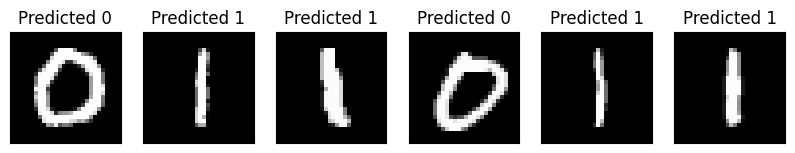

In [66]:
# Plot predicted labels
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model4.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model4(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        axes[count].imshow(data[0].numpy().squeeze(), cmap="gray")

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {}".format(pred.item()))

        count += 1

Task 1: Run the same hybrid code but using a different quantum feature map or optimizer.

Task 2: Try using a different data i.e  The surface-crack dataset to classify clack and non-crack images.

The data can be imported from github with the code below:

In [67]:
!git clone https://github.com/bimewok/Concrete-Crack-Image-Classifier

Cloning into 'Concrete-Crack-Image-Classifier'...
remote: Enumerating objects: 38471, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38471 (delta 14), reused 27 (delta 6), pack-reused 38429
Receiving objects: 100% (38471/38471), 223.34 MiB | 22.86 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (40007/40007), done.


Below is the file structure of the dataset:

    /Concrete Crack Images for Classification

            /train
                /crack
                /no_crack
            /test
                /crack
                /no_crack
            /val
                /crack
                /no_crack